# Step 6: Neural Network & PyTorch

## tensor.py

In [1]:
import torch

x = torch.tensor(5.0, requires_grad=True)
y = 3 * x ** 2
print(y)

y.backward()
print(x.grad)

tensor(75., grad_fn=<MulBackward0>)
tensor(30.)


## gradient.py

In [2]:
import torch

def rosenbrock(x0, x1):
    y = 100 * (x1 - x0 ** 2) ** 2 + (x0 - 1) ** 2
    return y

x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)

y = rosenbrock(x0, x1)
y.backward()
print(x0.grad, x1.grad)

lr = 0.001  # learning rate
iters = 10000  # iteration count

for i in range(iters):
    if i % 1000 == 0:
        print(x0.item(), x1.item())

    y = rosenbrock(x0, x1)

    y.backward()

    x0.data -= lr * x0.grad.data
    x1.data -= lr * x1.grad.data

    x0.grad.zero_()
    x1.grad.zero_()

print(x0.item(), x1.item())

tensor(-2.) tensor(400.)
0.0 2.0
0.6815015077590942 0.46292299032211304
0.8253857493400574 0.6804871559143066
0.8942827582359314 0.7992911338806152
0.9331904053688049 0.8705660700798035
0.9568046927452087 0.9152978658676147
0.9716982245445251 0.9440822601318359
0.9813036918640137 0.9628812670707703
0.98758465051651 0.9752733111381531
0.9917276501655579 0.983490526676178
0.9944759607315063 0.9889602065086365


## regression.py

41.89796447753906
0.22483204305171967
0.0925208106637001
0.0888015553355217
0.08627457916736603
0.08435674756765366
0.0829005315899849
0.0817948430776596
0.08095530420541763
0.08031783998012543
0.07987643033266068
====
W = 2.2863590717315674
b = 5.3144850730896


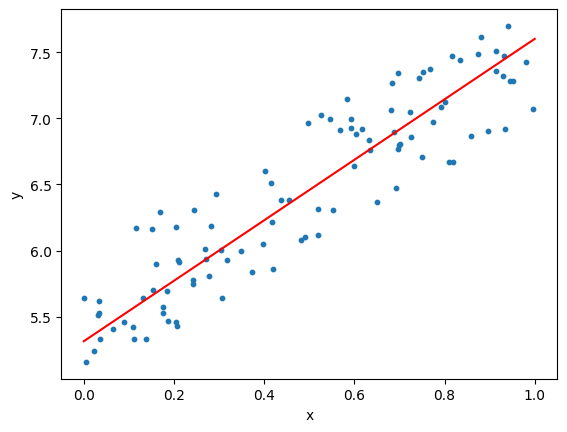

In [3]:
import torch


torch.manual_seed(0)
x = torch.rand(100, 1)
y = 5 + 2 * x + torch.rand(100, 1)

W = torch.zeros((1, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

def predict(x):
    y = x @ W + b
    return y

def mean_squared_error(x0, x1):
    diff = x0 - x1
    N = len(diff)
    return torch.sum(diff ** 2) / N

lr = 0.1
iters = 100

for i in range(iters):
    y_hat = predict(x)
    loss = mean_squared_error(y, y_hat)

    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data

    W.grad.zero_()
    b.grad.zero_()

    if i % 10 == 0: # print every 10 iterations
        print(loss.item())

print(loss.item())
print('====')
print('W =', W.item())
print('b =', b.item())


# plot
import matplotlib.pyplot as plt
plt.scatter(x.detach().numpy(), y.detach().numpy(), s=10)
x = torch.tensor([[0.0], [1.0]])
y = W.detach().numpy() * x.detach().numpy() + b.detach().numpy()
plt.plot(x, y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## neuralnet.py

0.7643452286720276
0.23656320571899414
0.23226076364517212
0.22441408038139343
0.21026146411895752
0.17957879602909088
0.11798454076051712
0.08481380343437195
0.08023109287023544
0.0796855092048645
0.07945814728736877


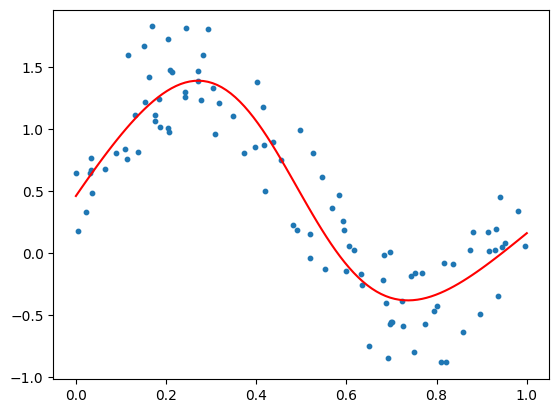

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F


torch.manual_seed(0)
x = torch.rand(100, 1)
y = torch.sin(2 * torch.pi * x) + torch.rand(100, 1)

# model
class Model(nn.Module):
    def __init__(self, input_size=1, hidden_size= 10, output_size=1):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        y = self.linear1(x)
        y = F.sigmoid(y)
        y = self.linear2(y)
        return y


lr = 0.2
iters = 10000

model = Model()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for i in range(iters):
    y_pred = model(x)
    loss = F.mse_loss(y, y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 1000 == 0:
        print(loss.item())

print(loss.item())

# plot
import matplotlib.pyplot as plt
plt.scatter(x.detach().numpy(), y.detach().numpy(), s=10)
x = torch.linspace(0, 1, 100).reshape(-1, 1)
y = model(x).detach().numpy()
plt.plot(x, y, color='red')
plt.show()

## vision.py

100%|██████████| 9912422/9912422 [00:01<00:00, 6778804.78it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 3582730.29it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 5282915.73it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 8873092.11it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

size: 60000
type: <class 'PIL.Image.Image'>
label: 5


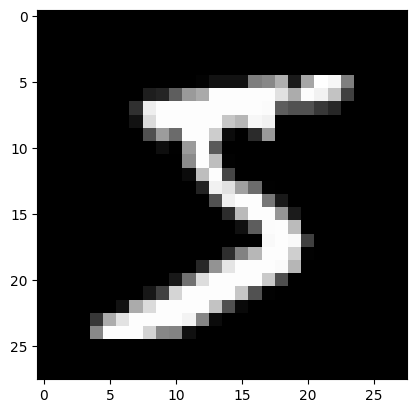

type: <class 'torch.Tensor'>
shape: torch.Size([1, 28, 28])
x shape: torch.Size([32, 1, 28, 28])
label shape: torch.Size([32])


In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


## ==== MNIST ====
dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=None,
    download=True
)

x, label = dataset[0]

print('size:', len(dataset))  # size: 60000
print('type:', type(x))  # type: <class 'PIL.Image.Image'>
print('label:', label)  # label: 5

plt.imshow(x, cmap='gray')
plt.show()


# ==== preprocess ====
transform = transforms.ToTensor()

dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

x, label = dataset[0]
print('type:', type(x))  # type: <class 'torch.Tensor'>
print('shape:', x.shape)  # shape: torch.Size([1, 28, 28])


# ==== DataLoader ====
dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=32,
    shuffle=True)

for x, label in dataloader:
    print('x shape:', x.shape)  # shape: torch.Size([32, 1, 28, 28])
    print('label shape:', label.shape)  # shape: torch.Size([32])
    break